# Task 1: Exploratory Data Analysis

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("PhishingData.csv")

# Display the first few rows to understand the data
print(df.head())

   SFH  popUpWidnow  SSLfinal_State  Request_URL  URL_of_Anchor  web_traffic   
0    1           -1               1           -1             -1            1  \
1   -1           -1              -1           -1             -1            0   
2    1           -1               0            0             -1            0   
3    1            0               1           -1             -1            0   
4   -1           -1               1           -1              0            0   

   URL_Length  age_of_domain  having_IP_Address  Result  
0           1              1                  0       0  
1           1              1                  1       1  
2          -1              1                  0       1  
3           1              1                  0       0  
4          -1              1                  0       1  


In [2]:
# Summary statistics
print(df.describe())

# Information about the dataset
print(df.info())

# Check the distribution of the 'Result' column
print(df['Result'].value_counts())

               SFH  popUpWidnow  SSLfinal_State  Request_URL  URL_of_Anchor   
count  1353.000000  1353.000000     1353.000000  1353.000000    1353.000000  \
mean      0.237990    -0.258684        0.327421    -0.223208      -0.025129   
std       0.916389     0.679072        0.822193     0.799682       0.936262   
min      -1.000000    -1.000000       -1.000000    -1.000000      -1.000000   
25%      -1.000000    -1.000000        0.000000    -1.000000      -1.000000   
50%       1.000000     0.000000        1.000000     0.000000       0.000000   
75%       1.000000     0.000000        1.000000     0.000000       1.000000   
max       1.000000     1.000000        1.000000     1.000000       1.000000   

       web_traffic   URL_Length  age_of_domain  having_IP_Address       Result  
count  1353.000000  1353.000000    1353.000000        1353.000000  1353.000000  
mean      0.000000    -0.053215       0.219512           0.114560    -0.113821  
std       0.806776     0.762552       0.97597

# Task 2: Compare Parametric and Non-Parametric Models

### 2.1 Non-Parametric Model (K-Nearest Neighbors - KNN)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Define features and target
X = df.drop(columns=['Result'])
y = df['Result']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Create and train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [5]:
# Make predictions
y_pred = knn.predict(X_test)

In [6]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

KNN Accuracy: 0.8523985239852399
Confusion Matrix:
 [[115   4  13]
 [  4  14   7]
 [  9   3 102]]


In [7]:
# Create a confusion matrix plot function
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

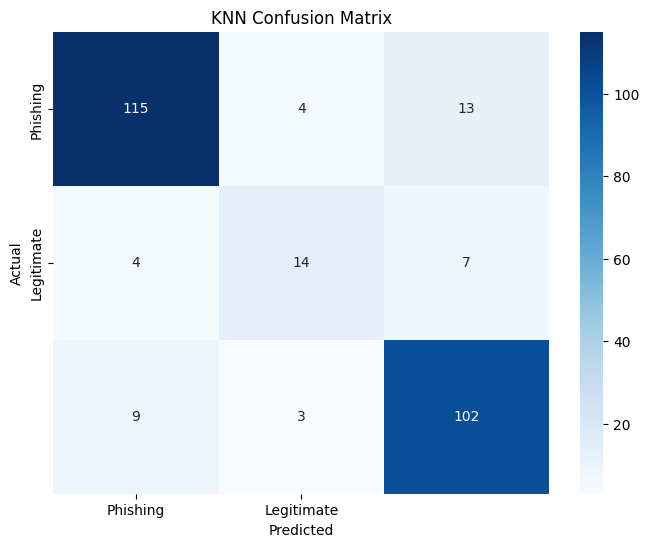

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the confusion matrix for KNN
plot_confusion_matrix(y_test, y_pred, labels=['Phishing', 'Legitimate'], title='KNN Confusion Matrix')

### 2.2 Parametric Model (Artificial Neural Network - ANN)

In [9]:
X_train.shape

(1082, 9)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("ANN Accuracy:", accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

Epoch 1/10
28/28 [==============================] - 1s 8ms/step - loss: 0.2800 - accuracy: 0.2474 - val_loss: -0.2588 - val_accuracy: 0.2627
Epoch 2/10
28/28 [==============================] - 0s 3ms/step - loss: -0.6272 - accuracy: 0.2324 - val_loss: -1.3577 - val_accuracy: 0.2811
Epoch 3/10
28/28 [==============================] - 0s 3ms/step - loss: -1.9644 - accuracy: 0.2555 - val_loss: -3.2701 - val_accuracy: 0.3041
Epoch 4/10
28/28 [==============================] - 0s 3ms/step - loss: -4.4003 - accuracy: 0.2647 - val_loss: -6.9048 - val_accuracy: 0.3041
Epoch 5/10
28/28 [==============================] - 0s 3ms/step - loss: -8.9497 - accuracy: 0.2671 - val_loss: -13.0517 - val_accuracy: 0.3041
Epoch 6/10
28/28 [==============================] - 0s 3ms/step - loss: -16.1284 - accuracy: 0.2682 - val_loss: -22.8545 - val_accuracy: 0.3088
Epoch 7/10
28/28 [==============================] - 0s 3ms/step - loss: -28.3218 - accuracy: 0.2728 - val_loss: -38.5151 - val_accuracy: 0.3088
Ep

Text(0.5, 1.0, 'ANN Training and Validation Accuracy')

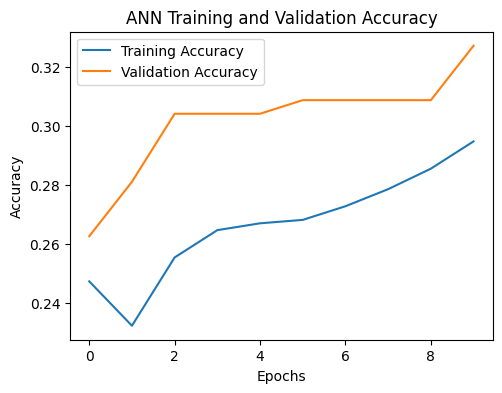

In [12]:
# Plot accuracy curves for ANN
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('ANN Training and Validation Accuracy')

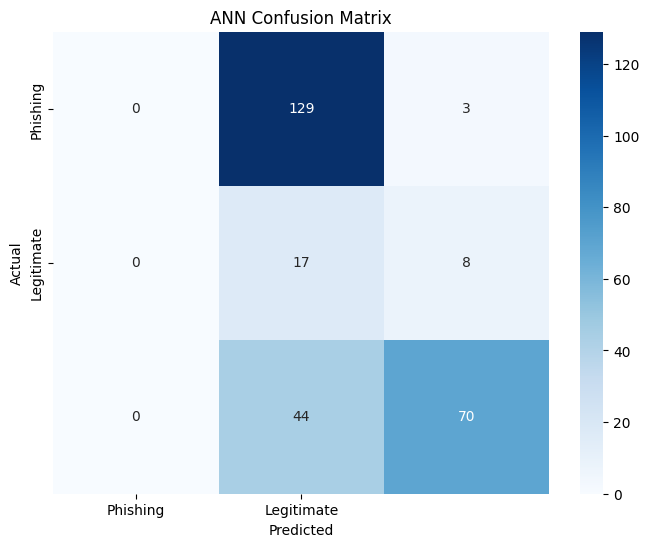

In [13]:
# Plot the confusion matrix for ANN
plot_confusion_matrix(y_test, y_pred, labels=['Phishing', 'Legitimate'], title='ANN Confusion Matrix')

### 2.3 Convolutional Neural Network (CNN)

In [14]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
num_classes = 3

X_train_cnn = np.expand_dims(X_train, axis=2)
y_train_cnn = y_train.values
X_test_cnn = np.expand_dims(X_test, axis=2)
y_test_cnn = y_test.values

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
28/28 [==============================] - 1s 9ms/step - loss: -0.2563 - accuracy: 0.0740 - val_loss: -1.4772 - val_accuracy: 0.0829
Epoch 2/10
28/28 [==============================] - 0s 4ms/step - loss: -3.3736 - accuracy: 0.1283 - val_loss: -6.0961 - val_accuracy: 0.1843
Epoch 3/10
28/28 [==============================] - 0s 4ms/step - loss: -10.7581 - accuracy: 0.1549 - val_loss: -17.4839 - val_accuracy: 0.2074
Epoch 4/10
28/28 [==============================] - 0s 3ms/step - loss: -26.9621 - accuracy: 0.2092 - val_loss: -39.5044 - val_accuracy: 0.1982
Epoch 5/10
28/28 [==============================] - 0s 3ms/step - loss: -57.0763 - accuracy: 0.2023 - val_loss: -77.3397 - val_accuracy: 0.1889
Epoch 6/10
28/28 [==============================] - 0s 3ms/step - loss: -108.0427 - accuracy: 0.1549 - val_loss: -141.2771 - val_accuracy: 0.1797
Epoch 7/10
28/28 [==============================] - 0s 4ms/step - loss: -190.2679 - accuracy: 0.1746 - val_loss: -237.9967 - val_accuracy:

Text(0.5, 1.0, 'CNN Training and Validation Accuracy')

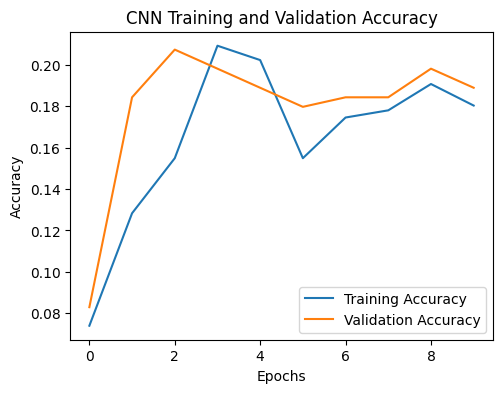

In [16]:
# Plot accuracy curves for CNN
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('CNN Training and Validation Accuracy')

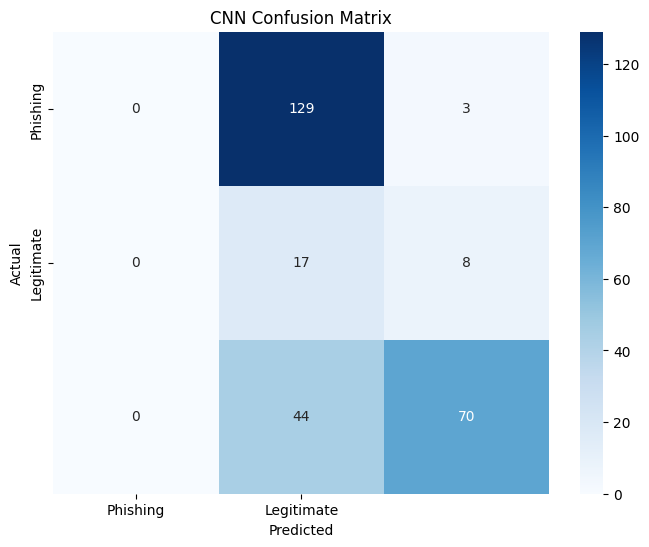

In [17]:
# Plot the confusion matrix for CNN
plot_confusion_matrix(y_test_cnn, y_pred, labels=['Phishing', 'Legitimate'], title='CNN Confusion Matrix')

In [18]:
y_pred = (model.predict(X_test_cnn) > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_cnn, y_pred)
print("CNN Accuracy:", accuracy)

# Create a confusion matrix
confusion = confusion_matrix(y_test_cnn, y_pred)
print("Confusion Matrix:\n", confusion)

9/9 [==============================] - 0s 2ms/step
CNN Accuracy: 0.18450184501845018
Confusion Matrix:
 [[  0 132   0]
 [  0  22   3]
 [  0  86  28]]
